# G2M: Cab Industry

### Week 2

##### Submitted By: Aman Niyaz

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df_cab = pd.read_csv('./datasets/Cab_Data.csv')
df_city = pd.read_csv('./datasets/City.csv')
df_cust = pd.read_csv('./datasets/Customer_ID.csv')
df_tran = pd.read_csv('./datasets/Transaction_ID.csv')

In [3]:
df_cab.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [4]:
print("Number of rows: ", df_cab.shape[0])
print("Number of columns: ", df_cab.shape[1])

Number of rows:  359392
Number of columns:  7


In [5]:
print("Minimum Date: ", df_cab['Date of Travel'].min())
print("Maximum Date: ", df_cab['Date of Travel'].max())

Minimum Date:  42371
Maximum Date:  43465


In [6]:
##Handling Traveling Date
from datetime import datetime

min_date = df_cab['Date of Travel'].min()
max_date = df_cab['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + min_date - 2).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + max_date - 2).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

31-01-2016
29-01-2019


In [7]:
def handle_date(date):
    return datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")

In [8]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda x: handle_date(x))

In [9]:
df_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,06-02-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,02-02-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,03-02-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,03-02-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [10]:
df_city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [11]:
df_cust

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [12]:
df_tran

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [13]:
df_cab_copy = df_cab
df_city_copy = df_city
df_cust_copy = df_cust
df_tran_copy = df_tran

In [14]:
df_tran_cust = pd.merge(df_tran, df_cust, on='Customer ID')
df_tran_cust

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [15]:
df_cab_tran_cust = pd.merge(df_cab, df_tran_cust, on='Transaction ID')
df_cab_tran_cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,06-02-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,02-02-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,03-02-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,03-02-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [16]:
df_cab_tran_cust_city = pd.merge(df_cab_tran_cust, df_city, on='City')
df_cab_tran_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,06-02-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,02-02-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,03-02-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,03-02-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


##### Handling Population and Users datafield

In [17]:
def convert_int(x):
    return int(x.replace(',', ''))

In [18]:
df_cab_tran_cust_city['Population'] = df_cab_tran_cust_city['Population'].apply(lambda x: convert_int(x))
df_cab_tran_cust_city['Users'] = df_cab_tran_cust_city['Users'].apply(lambda x: convert_int(x))
df_cab_tran_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,06-02-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,02-02-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,03-02-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,03-02-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


## EDA Starts here

Now our Exploratory Data Analysis(EDA) starts. We have merged all four dataset safely without lossing any data. Although we have raise many null values. But we are going to see how the data is going to perform. First we take the dataset produced in a new dataframe `df`. Lets start working on this.

In [19]:
df = df_cab_tran_cust_city
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,06-02-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701
1,10000012,04-02-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701
2,10000013,31-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885,24701
3,10000014,05-02-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885,24701
4,10000015,01-02-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,814885,24701


Let's save our master dataset

In [20]:
df.to_csv('masterdata.csv')

In [21]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

**CONCLUSION:** Here we don't see any missing values, the reason being is that I merged the dataset in such a way that we have maximum of the dataset filled. I also tried the other way round where I was getting around 87,000 missing values for almost five columns which could be difficult to understand the bahviour of the dataset. hence I approached it in this way where I simply erased those many data points at the time of merging them.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 41.1+ MB


## Understanding the numerical dataset

Below we can understand some of the important numerical attributes such as `KM Travelled`, `Price Charged`, `Cost of Trip`, `Age`, `Income(USD/Month)`, `Population` and `Users`. These are really crutial data. We ignore the `Transaction ID` and `Customer ID` here as they are not of any significance at the moment. 

In [23]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


<AxesSubplot:>

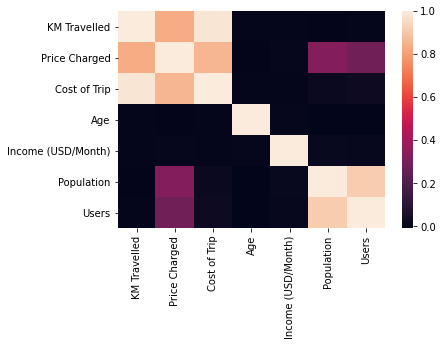

In [24]:
#correlation matrix
sns.heatmap(df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']].corr())

**CONCLUSION:** Clearly the correlation between the fields are obvious. The heatmap shows that `KM Travelled` is very much related to `Cost of Trip` and `Price Charged`. Also it doesn't depend on Age or Income of the customer.

There is a strong correlation between `Population` and `Users` as well which is very obvious.

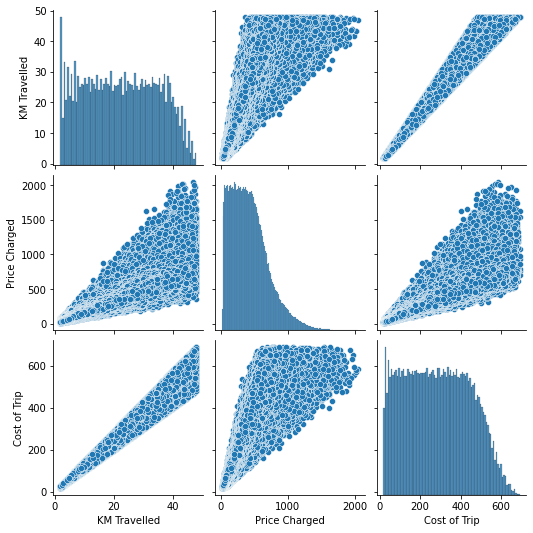

In [25]:
sns.pairplot(data=df[['KM Travelled', 'Price Charged', 'Cost of Trip']])
plt.show()

### Understanding the categorical columns

In [26]:
cat_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for name in cat_col:
    print(f"*************{name}****************")
    print("TOTAL: ", df[name].count())
    print(df[name].value_counts())
print("##############END###############")

*************Company****************
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
*************City****************
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
*************Payment_Mode****************
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
*************Gender****************
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64
##############END###############


**CONCLUSION:** Clearly, we can see the number of categorical data to each datafield. Some nice observations are: They are only two types of Cab companies `Yellow Cab` and `Pink Cab`. `Yellow Cab` is widely preferred by the customers. `Payment_Mode` has `Card` payment has 2/3rd of the `Cash` payment. Also, `Male` and `Female` customers ratio is somewhat _4:3_

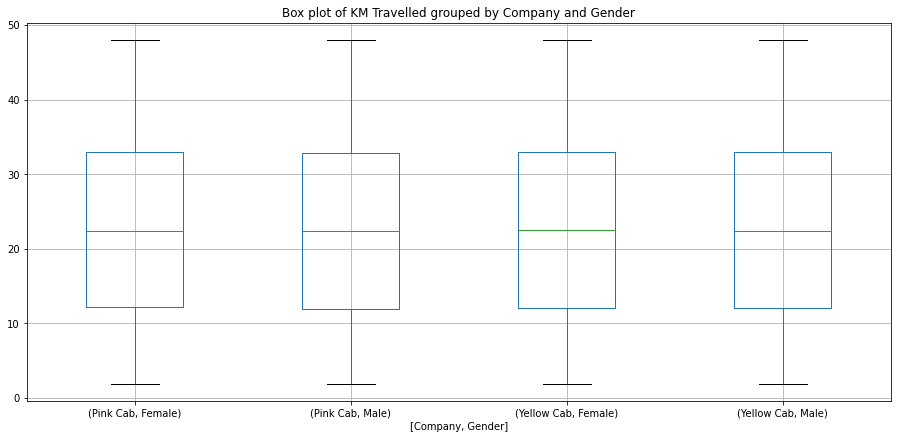

In [27]:
# Boxp lots of balance, grouped by the categorical attribute education
df.boxplot(column='KM Travelled', by=['Company', 'Gender'], figsize=(15, 7))
plt.title('Box plot of KM Travelled grouped by Company and Gender')
plt.suptitle("")
plt.show()

**CONCLUSION:** We see that there are no outliers in the data. It is because the data collection is from an authentic source.

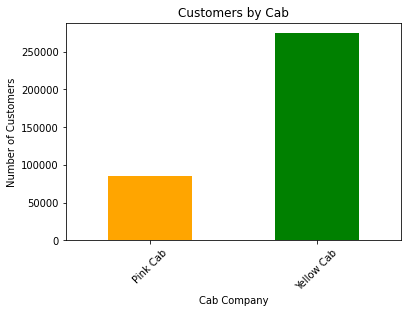

In [35]:
df['Company'].value_counts(ascending=True).plot(kind='bar', color=['orange', 'green'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

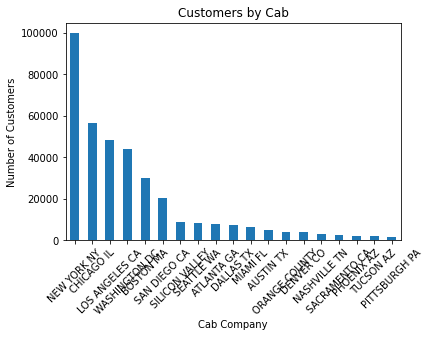

In [48]:
df['City'].value_counts().plot(kind='bar', rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

<AxesSubplot:>

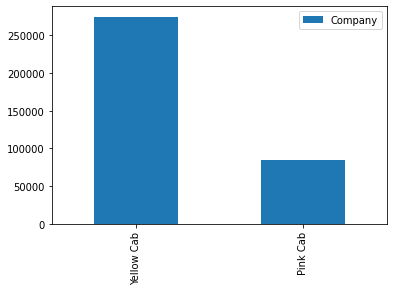

In [47]:
df[['Company']].apply(pd.Series.value_counts).plot(kind='bar')

In [52]:
# sns.catplot(x="City", y=df['Company'].value_counts(normalize=True), hue="Gender", kind="bar", data=df)

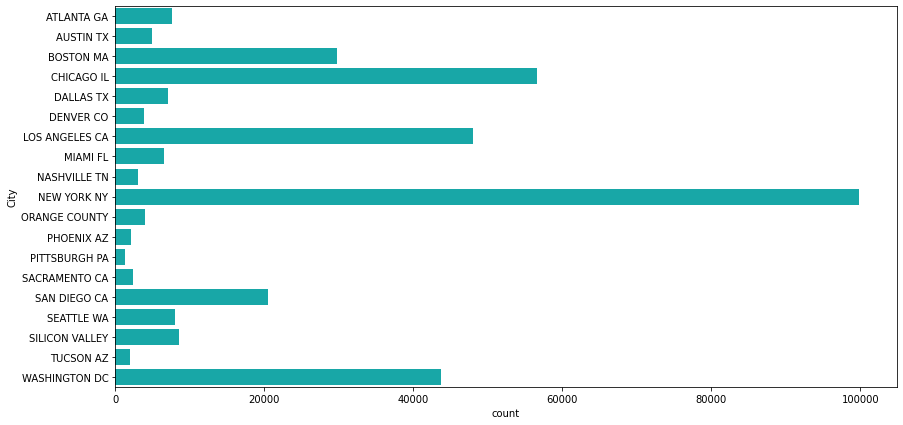

In [57]:
f, ax = plt.subplots(figsize=(14, 7))
ax = sns.countplot(y="City", data=df, color="c")


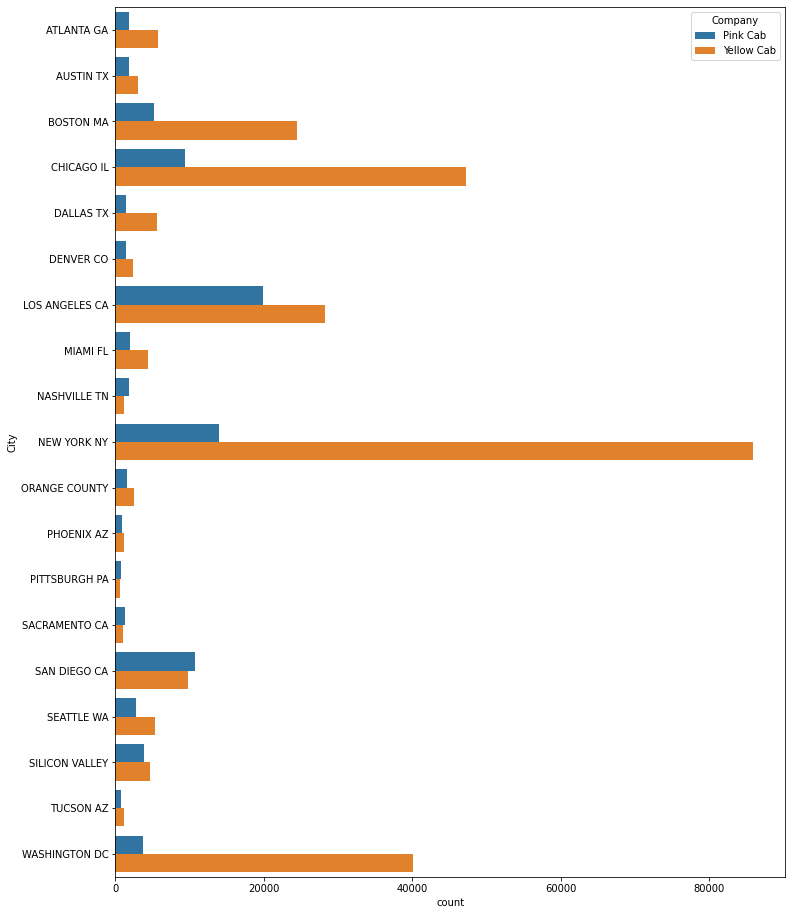

In [79]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Company', data=df)
plt.show()

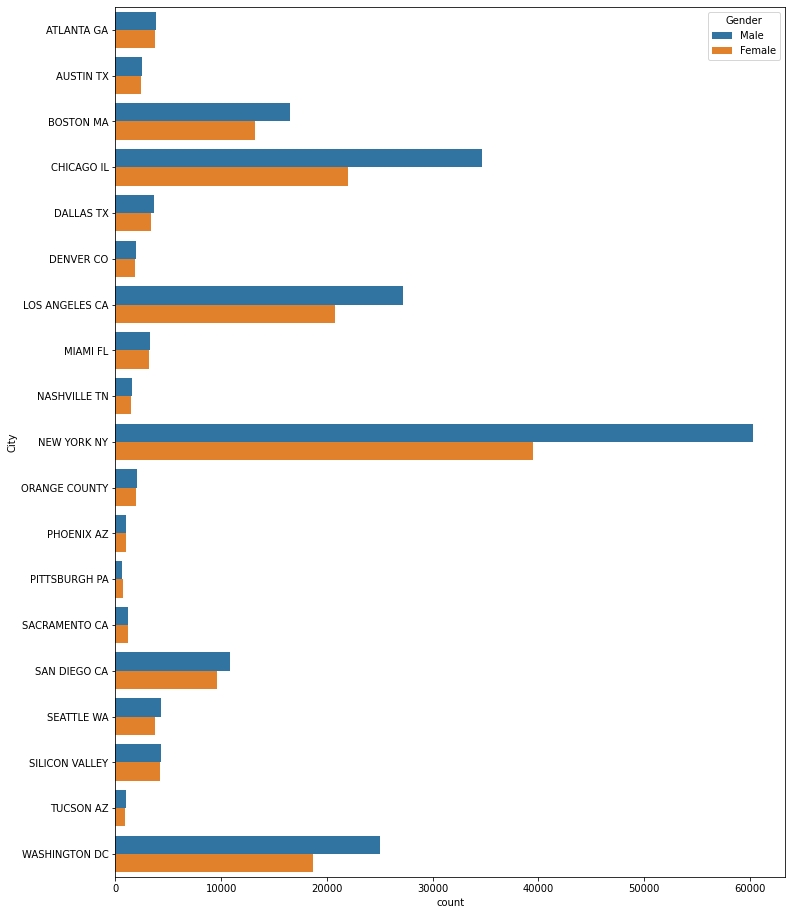

In [80]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Gender', data=df)
plt.show()

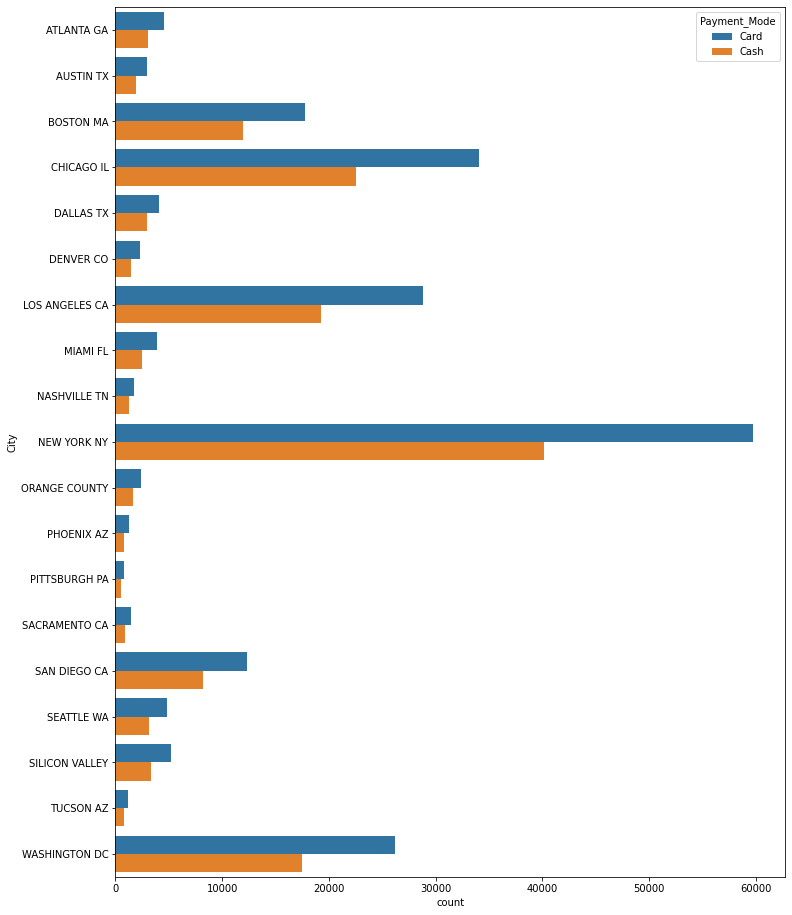

In [81]:
%matplotlib inline
f, ax = plt.subplots(figsize=(12, 16))
# sns.set(style="darkgrid")
ax = sns.countplot(y='City', hue='Payment_Mode', data=df)
plt.show()